
--- Analisador de Sentimento (PT-BR) ---

Escolha uma opção:
1 - Analisar um comentário
2 - Analisar vários comentários
0 - Sair


Opção:  2


Digite vários comentários (digite 'FIM' para encerrar):


>  Esse produto é uma porcaria
>  Otimo produto, de extrema qualidade, perfeito para o serviço 
>  odiei o produto 
>  fim



--- Resultados ---
                                          Comentário      Sentimento  Score
0                        Esse produto é uma porcaria          Neutro      0
1  Otimo produto, de extrema qualidade, perfeito ...  Super Positivo      5
2                                   odiei o produto           Neutro      0

Total de comentários analisados: 3


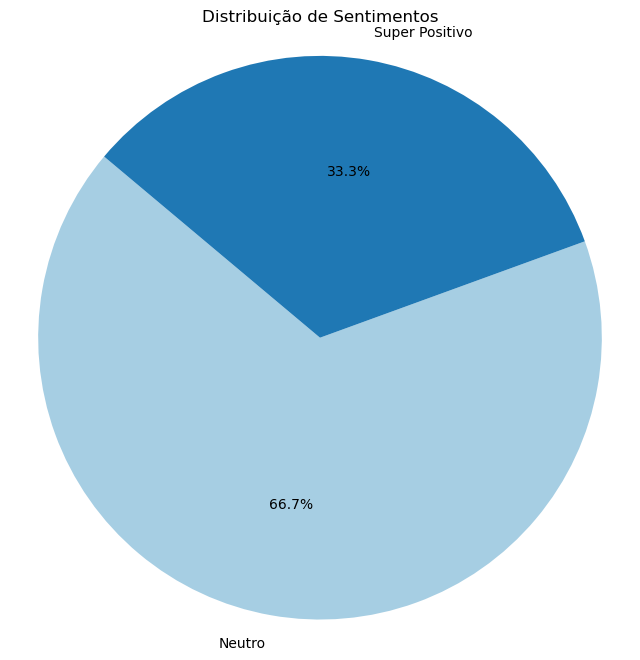


Escolha uma opção:
1 - Analisar um comentário
2 - Analisar vários comentários
0 - Sair


In [ ]:
import string  
import pandas as pd  
import matplotlib.pyplot as plt  
from nltk.tokenize import word_tokenize  

class AnalisadorSentimento:  
    def __init__(self):  
        self.vocabulario = {  
            "ambiguas": [  
                "estranho", "curioso", "diferente", "incerto", "paradoxal", "misterioso",  
                "duvidoso", "surpreendente", "complexo", "sutil", "impactante", "irregular",  
                "anômalo", "singular", "incomum", "nova", "exótico", "inusitado", "variável",  
                "controverso", "dilema", "desconhecido", "questionável", "irônico", "peculiar",  
                "vago", "ambíguo", "enigmático", "parcial", "dissonante", "esporádico",  
                "crítico", "desequilibrado", "oculto", "fantástico", "nebuloso", "decisivo",  
                "flexível", "imperceptível", "mágico", "alucinado", "residual", "escasso",  
                "inominável", "intrigante", "plurilíngue", "não convencional", "reversível",  
                "comum", "enredeado", "insólito", "alternativo", "intricado", "misterioso",  
                "mutável", "não determinado", "esotérico", "transcendente", "irresoluto",  
                "duvidoso", "inexplorado", "surrealista", "sem sentido", "vanguardista",   
                "além", "impossível", "metafísico", "fragmentado", "ímpar", "variável",   
                "anárquico", "confuso", "afetivo", "difuso", "infinito", "imprevisível",   
                "provocativo"  
            ],  
            "super_positivas": {  
                "ótimo": 5, "excelente": 5, "maravilhoso": 5, "incrível": 5, "fabuloso": 5,  
                "fantástico": 5, "magnífico": 5, "excepcional": 5, "notável": 5, "glorioso": 5,  
                "extraordinário": 5, "maravilha": 5, "belíssimo": 5, "sensacional": 5, "power": 5,  
                "fantástico": 5, "formidável": 5, "impressionante": 5, "espetacular": 5, "primoroso": 5,  
                "prevaleceu": 5, "grandioso": 5, "marcado": 5, "incomparável": 5, "deslumbrante": 5,  
                "surpreendente": 5, "sublime": 5, "ilustre": 5, "idílico": 5, "brilhante": 5,  
                "encantador": 5, "vitorioso": 5, "prodigioso": 5, "estimável": 5, "ultrapassado": 5,  
                "elegante": 5, "refinado": 5, "lucrativo": 5, "eficaz": 5, "econômico": 5,  
                "pioneiro": 5, "heróico": 5, "intocável": 5, "valioso": 5, "inconteste": 5,  
                "apoteótico": 5, "ancestral": 5, "encontro": 5, "perfeito": 5, "admirável": 5,  
                "preponderante": 5, "retumbante": 5,   
                "coeso": 5, "afetuoso": 5, "genuíno": 5, "harmonioso": 5, "efêmero": 5,  
                "belo": 5, "avantajado": 5, "augusto": 5, "simétrico": 5, "honroso": 5,  
                "solidário": 5,  
                "conveniente": 5, "customizável": 5, "dinâmico": 5  
            },  
            "super_negativas": {  
                "péssimo": -5, "horrível": -5, "terrível": -5, "inaceitável": -5, "absurdo": -5,  
                "atroz": -5, "desastroso": -5, "abominável": -5, "intolerável": -5, "injustificável": -5,  
                "desagradável": -5, "deplorável": -5, "drástico": -5, "negativo": -5, "insuportável": -5,  
                "trágico": -5, "lamentável": -5, "ruinoso": -5, "calamitoso": -5, "repreensível": -5,  
                "desolador": -5, "devastador": -5, "degradante": -5, "subestimado": -5, "concebível": -5,  
                "odioso": -5, "infeliz": -5, "desolado": -5, "inútil": -5, "desfavorável": -5,  
                "desgraceiro": -5, "repugnante": -5, "horrendo": -5, "desesperador": -5, "decepcionante": -5,  
                "miserável": -5, "desonroso": -5, "frustrante": -5, "estéril": -5, "cheio de falhas": -5,  
                "crítico": -5, "transgressor": -5, "maldoso": -5, "desinteressante": -5, "vulgar": -5,  
                "desiludido": -5, "chocante": -5, "irrealizável": -5, "insossa": -5, "pretensiosa": -5,  
                "mau": -5, "odioso": -5, "sórdido": -5, "abrupto": -5, "feio": -5, "absoluto": -5,  
                "esgotante": -5, "derrotante": -5  
            },  
            "positivas": {  
                "bom": 2, "positivo": 2, "satisfatório": 2, "legal": 2, "agradável": 2,  
                "favorável": 2, "adequado": 2, "útil": 2, "revigorante": 2, "admirável": 2,  
                "benéfico": 2, "confortante": 2, "tranquilo": 2, "eficaz": 2, "saudável": 2,  
                "interessante": 2, "inspirador": 2, "atrativo": 2, "gostoso": 2, "agradável": 2,  
                "aprazível": 2, "satisfatório": 2, "calmo": 2, "próspero": 2, "justo": 2,  
                "solícito": 2, "promissor": 2, "desejado": 2, "bacana": 2, "confiável": 2,  
                "interativo": 2, "leal": 2, "crível": 2, "recompensador": 2, "cativante": 2,  
                "organizado": 2, "valioso": 2, "sensato": 2, "competente": 2, "elegante": 2,  
                "prático": 2, "esperançoso": 2, "milagroso": 2, "realista": 2, "estudioso": 2,  
                "prático": 2, "otimista": 2, "proveitoso": 2, "efetivo": 2, "determinado": 2,  
                "saudável": 2, "avançado": 2, "inovador": 2, "persuasivo": 2, "firme": 2,  
                "consistente": 2, "orredeiro": 2, "empático": 2, "fiel": 2, "tolerante": 2  
            },  
            "negativas": {  
                "ruim": -2, "desfavorável": -2, "decepcionante": -2, "chato": -2, "insatisfatório": -2,  
                "desagradável": -2, "desencorajador": -2, "infeliz": -2, "fraco": -2, "desanimador": -2,"perigoso": -2,"desastroso": -2, "deprimente": -2, "incerto": -2, "desperdiçado": -2,  
                "desiludido": -2, "trivial": -2, "irritante": -2, "fútil": -2, "crítico": -2,  
                "inadequado": -2, "desesperante": -2, "cansativo": -2, "desestimulante": -2,  
                "impreciso": -2, "incômodo": -2, "frustrante": -2, "fútil": -2, "inócuo": -2,  
                "prejudicial": -2, "desviador": -2, "desconsiderado": -2, "fracassado": -2,  
                "pessimista": -2, "inviável": -2, "falho": -2, "vago": -2, "complaint": -2,  
                "extenuante": -2, "desvalorizado": -2, "ouvido": -2, "disruptivo": -2, "removido": -2,  
                "escasso": -2, "injusto": -2, "substituto": -2, "desbenefício": -2, "desleal": -2,  
                "azarado": -2, "deslhecido": -2, "deficitário": -2, "sequoia": -2, "furioso": -2  
            }  
        }  

    def remover_acentos(self, texto):  
        # Implementação a ser realizada para remover acentos do texto, caso necessário.  
        return texto  # Lógica de remoção de acentos aqui  

    def remover_pontuacao(self, texto):  
        return texto.translate(str.maketrans("", "", string.punctuation))  

    def classificar_sentimento(self, comentario):  
        comentario = comentario.lower()  
        comentario = self.remover_acentos(comentario)  
        comentario = comentario.replace("nada ruim", "bom")  # Tratamento especial  
        comentario = self.remover_pontuacao(comentario)  
        palavras = word_tokenize(comentario, language="portuguese")  

        score_total = 0  
        ambiguidade_detectada = False  

        texto_limpo = ' '.join(palavras)  

        for amb in self.vocabulario["ambiguas"]:  
            if amb in texto_limpo:  
                ambiguidade_detectada = True  
                break  

        for palavra in palavras:  
            if palavra in self.vocabulario["super_positivas"]:  
                score_total += self.vocabulario["super_positivas"][palavra]  
            elif palavra in self.vocabulario["super_negativas"]:  
                score_total += self.vocabulario["super_negativas"][palavra]  
            elif palavra in self.vocabulario["positivas"]:  
                score_total += self.vocabulario["positivas"][palavra]  
            elif palavra in self.vocabulario["negativas"]:  
                score_total += self.vocabulario["negativas"][palavra]  

        if ambiguidade_detectada:  
            classificacao = "Ambíguo"  
        elif score_total >= 5:  
            classificacao = "Super Positivo"  
        elif 1 <= score_total < 5:  
            classificacao = "Positivo"  
        elif score_total <= -5:  
            classificacao = "Super Negativo"  
        elif -5 < score_total <= -1:  
            classificacao = "Negativo"  
        else:  
            classificacao = "Neutro"  

        return classificacao, score_total  

    def analisar_comentarios(self, comentarios):  
        resultados = []  
        for comentario in comentarios:  
            sentimento, score = self.classificar_sentimento(comentario)  
            resultados.append({"Comentário": comentario, "Sentimento": sentimento, "Score": score})  
        return pd.DataFrame(resultados)  

    def gerar_grafico(self, df_resultados):  
        contagem = df_resultados['Sentimento'].value_counts()  
        plt.figure(figsize=(8, 8))  
        plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)  
        plt.title('Distribuição de Sentimentos')  
        plt.axis('equal')  
        plt.show()  

def menu():  
    print("\n--- Analisador de Sentimento (PT-BR) ---")  
    analisador = AnalisadorSentimento()  

    while True:  
        print("\nEscolha uma opção:")  
        print("1 - Analisar um comentário")  
        print("2 - Analisar vários comentários")  
        print("0 - Sair")  

        opcao = input("Opção: ")  

        if opcao == "1":  
            comentario = input("Digite o comentário: ")  
            sentimento, score = analisador.classificar_sentimento(comentario)  
            print(f"Comentário: '{comentario}' → Classificação: {sentimento} (Score: {score})")  

        elif opcao == "2":  
            print("Digite vários comentários (digite 'FIM' para encerrar):")  
            comentarios = []  
            while True:  
                linha = input("> ")  
                if linha.strip().lower() == "fim":  
                    break  
                comentarios.append(linha)  

            df_resultados = analisador.analisar_comentarios(comentarios)  
            print("\n--- Resultados ---")  
            print(df_resultados)  
            print(f"\nTotal de comentários analisados: {len(df_resultados)}")  

            analisador.gerar_grafico(df_resultados)  

        elif opcao == "0":  
            print("Encerrando.")  
            break  
        else:  
            print("Opção inválida.")  

if __name__ == "__main__":  
    menu()  
